In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing libraries to evaluate the quality of the model

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [3]:
from sklearn.metrics import roc_auc_score

In [4]:
import sklearn.metrics as metrics

## ROC and AUC with the Default dataset

In [5]:
Default_df= pd.read_csv('C:\\Users\\jheredi2\\Documents\\PythonDataAnalytics\\1-Datasets\\Default.csv')

In [6]:
Default_df_dummies= pd.get_dummies(Default_df,columns=['student'], drop_first=True)

In [7]:
Default_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      10000 non-null  object 
 1   balance      10000 non-null  float64
 2   income       10000 non-null  float64
 3   student_Yes  10000 non-null  uint8  
dtypes: float64(2), object(1), uint8(1)
memory usage: 244.3+ KB


In [8]:
X_train_def, X_test_def, y_train_def, y_test_def= train_test_split (Default_df_dummies.iloc[:,1:], Default_df['default'], test_size=0.2, random_state=1)

## AUC for Naive Bayes, Log Reg, KNN, and SVM

#### Naive Bayes with Gaussian function for predictors

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
pipe_default_nb = make_pipeline(StandardScaler(), GaussianNB())

In [12]:
pipe_default_nb.fit(X_train_def, y_train_def)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [13]:
print (classification_report (y_test_def, pipe_default_nb.predict(X_test_def)))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      1941
         Yes       0.60      0.36      0.45        59

    accuracy                           0.97      2000
   macro avg       0.79      0.67      0.72      2000
weighted avg       0.97      0.97      0.97      2000



In [15]:
fpr, tpr, threshold = metrics.roc_curve(y_test_def, pipe_default_nb.predict_proba(X_test_def)[:, 1], pos_label='Yes')

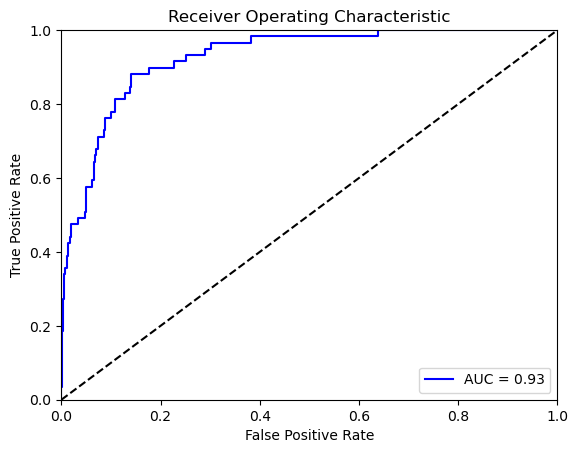

In [17]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
roc_auc_nb= roc_auc_score(y_test_def, pipe_default_nb.predict_proba(X_test_def)[:, 1])
np.round (roc_auc_nb, 3)

0.926

#### Logistic Regression

In [18]:
# Importing the method to apply logistic regression

from sklearn.linear_model import LogisticRegression

In [19]:
pipe_default_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter= 10000, class_weight={'No': 0.3, 'Yes': 0.7}, C=0.08255102040816327))

In [20]:
pipe_default_lr.fit(X_train_def, y_train_def)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.08255102040816327,
                                    class_weight={'No': 0.3, 'Yes': 0.7},
                                    max_iter=10000))])

In [21]:
print (classification_report (y_test_def, pipe_default_lr.predict(X_test_def)))

              precision    recall  f1-score   support

          No       0.98      0.99      0.98      1941
         Yes       0.46      0.36      0.40        59

    accuracy                           0.97      2000
   macro avg       0.72      0.67      0.69      2000
weighted avg       0.97      0.97      0.97      2000



In [22]:
roc_auc_lr= roc_auc_score(y_test_def, pipe_default_lr.predict_proba(X_test_def)[:, 1])
np.round (roc_auc_lr, 3)

0.929

In [36]:
fpr_lr, tpr_lr, threshold = metrics.roc_curve(y_test_def, pipe_default_lr.predict_proba(X_test_def)[:, 1], pos_label='Yes')

#### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
pipe_default_knn= make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='brute', n_neighbors=11, weights= 'uniform'))

In [25]:
pipe_default_knn.fit(X_train_def, y_train_def)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=11))])

In [26]:
print (classification_report (y_test_def, pipe_default_knn.predict(X_test_def)))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      1941
         Yes       0.53      0.32      0.40        59

    accuracy                           0.97      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.97      0.97      0.97      2000



C:\Users\jheredi2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
roc_auc_knn= roc_auc_score(y_test_def, pipe_default_knn.predict_proba(X_test_def)[:, 1])
np.round (roc_auc_knn, 3)

0.85

In [37]:
fpr_knn, tpr_knn, threshold = metrics.roc_curve(y_test_def, pipe_default_knn.predict_proba(X_test_def)[:, 1], pos_label='Yes')

#### SVM

In [28]:
from sklearn.svm import SVC

In [29]:
pipe_default_svm= make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=0.01, class_weight='balanced', probability= True))

In [30]:
pipe_default_svm.fit(X_train_def, y_train_def)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', kernel='poly',
                     probability=True))])

In [31]:
print (classification_report (y_test_def, pipe_default_svm.predict(X_test_def)))

              precision    recall  f1-score   support

          No       0.99      0.92      0.95      1941
         Yes       0.22      0.75      0.33        59

    accuracy                           0.91      2000
   macro avg       0.60      0.83      0.64      2000
weighted avg       0.97      0.91      0.93      2000



In [32]:
roc_auc_svm= roc_auc_score(y_test_def, pipe_default_svm.predict_proba(X_test_def)[:, 1])
np.round (roc_auc_svm, 3)

0.923

In [38]:
fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_test_def, pipe_default_svm.predict_proba(X_test_def)[:, 1], pos_label='Yes')

__Now you can plot all ROC and show their AUC values on the same graph__

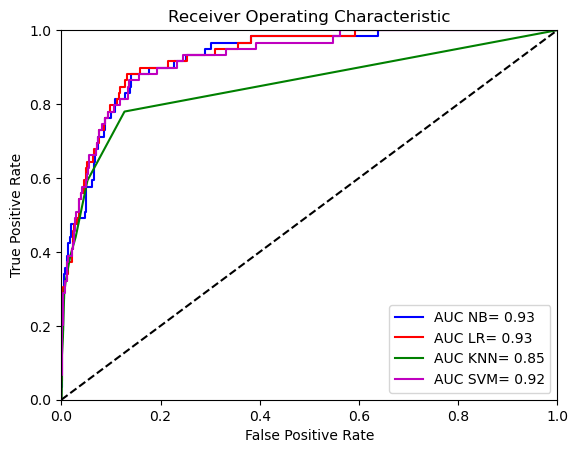

In [40]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC NB= %0.2f' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'r', label = 'AUC LR= %0.2f' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, 'g', label = 'AUC KNN= %0.2f' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, 'm', label = 'AUC SVM= %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()